In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import xgboost as xgb

In [295]:
df = pd.read_csv("PJME_hourly.csv")
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [297]:
#set date time column as index
df=df.set_index("Datetime")
df.index=pd.to_datetime(df.index)
df.index

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

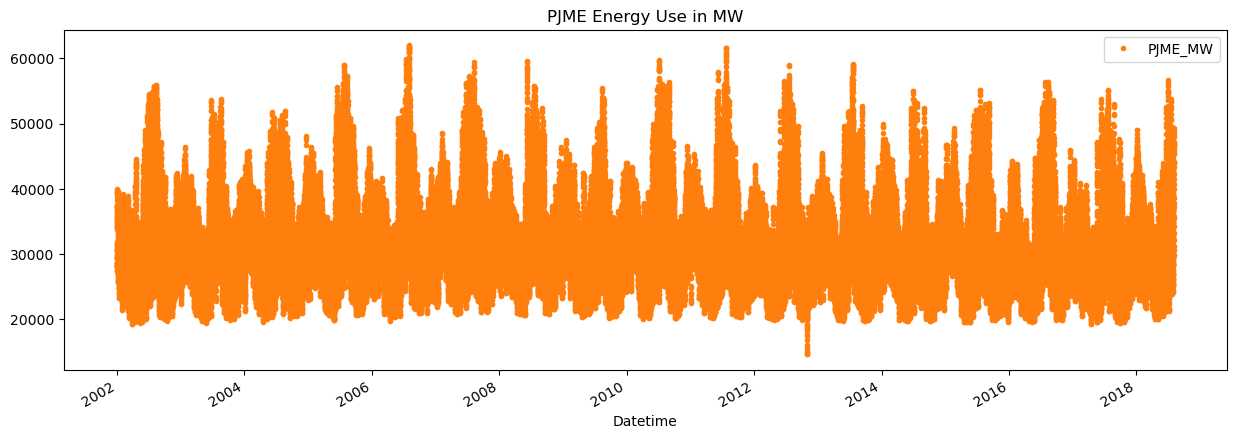

In [299]:
color_pal=sns.color_palette()
df.plot(style='.',
        figsize=(15,5),
        color=color_pal[1], 
        title='PJME Energy Use in MW')
plt.show()

In [300]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [303]:
df.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


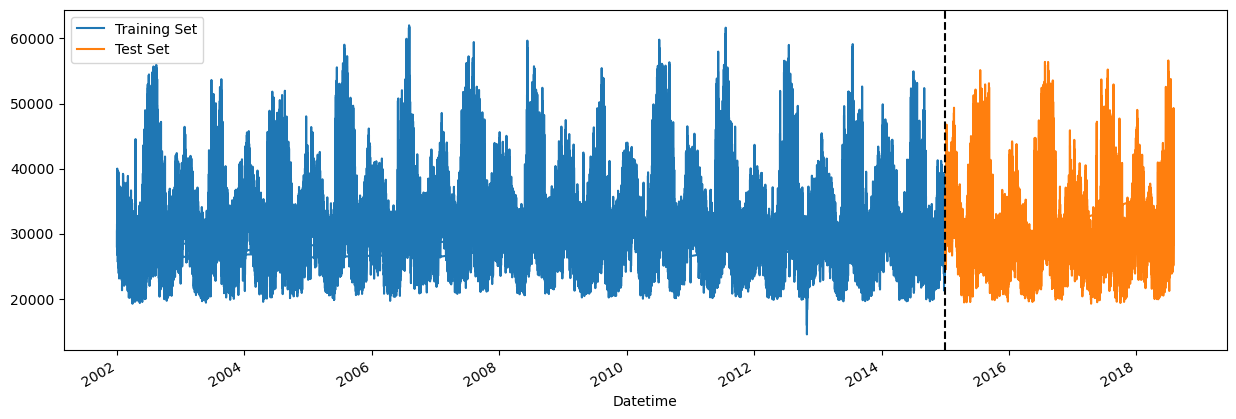

In [305]:
train = df.loc[df.index < '01-01-2015']
test  = df.loc[df.index >= '01-01-2015']
fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax , label='Traing Set')
test.plot(ax=ax , label='Test Set')
ax.axvline('01-01-2015' , color='black',ls='--')
ax.legend(['Training Set','Test Set'])
plt.show()

In [307]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')]

,PJME_MW
Datetime,
2010-01-07 01:00:00,32194.0
2010-01-07 02:00:00,31254.0
2010-01-07 03:00:00,30894.0
2010-01-07 04:00:00,30937.0
2010-01-07 05:00:00,31660.0
...,...
2010-01-01 20:00:00,35385.0
2010-01-01 21:00:00,35105.0
2010-01-01 22:00:00,34309.0


In [309]:
#stor the datetime
df = df.sort_index()

In [311]:
print(df.index.is_monotonic_increasing)  # Should return True if sorted

True


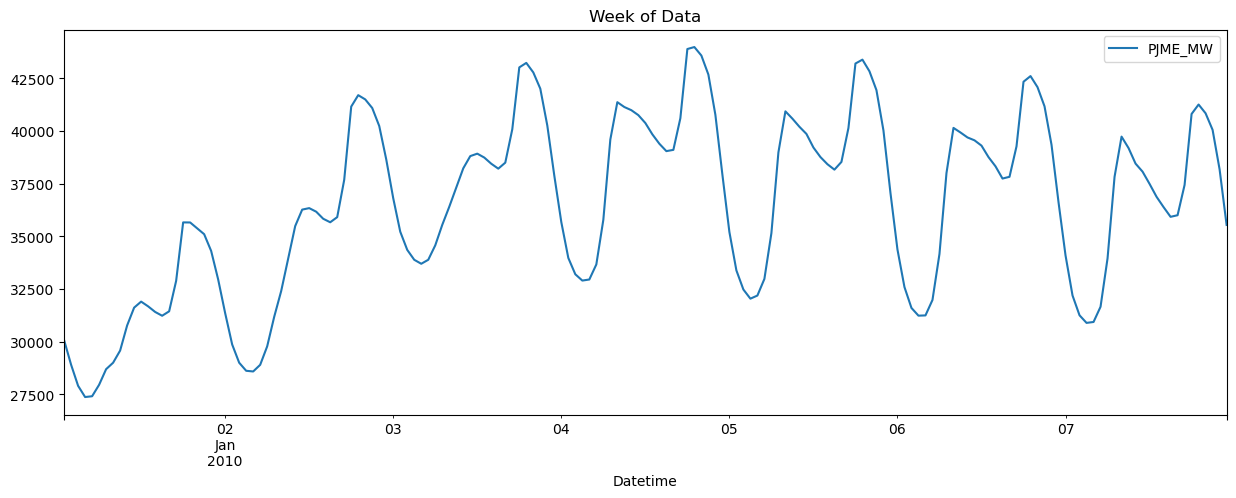

In [313]:
df.loc[(df.index > '2010-01-01') & (df.index < '2010-01-08')]\
  .plot(figsize=(15,5), title='Week of Data')
plt.show()

<h2>Feature Creation</h2>

In [316]:
def create_features(df):
     #crate time series features based on time series index.
     df = df.copy()
     df['hour'] = df.index.hour
     df['dayofweek'] = df.index.day_of_week #monday is 0 and sunday is 6
     df['quarter'] = df.index.quarter
     df['month'] = df.index.month
     df['year'] = df.index.year
     df['dayofyear'] = df.index.dayofyear
     return df

In [318]:
df =  create_features(df)

# Visualize our Feature / Target Relationship

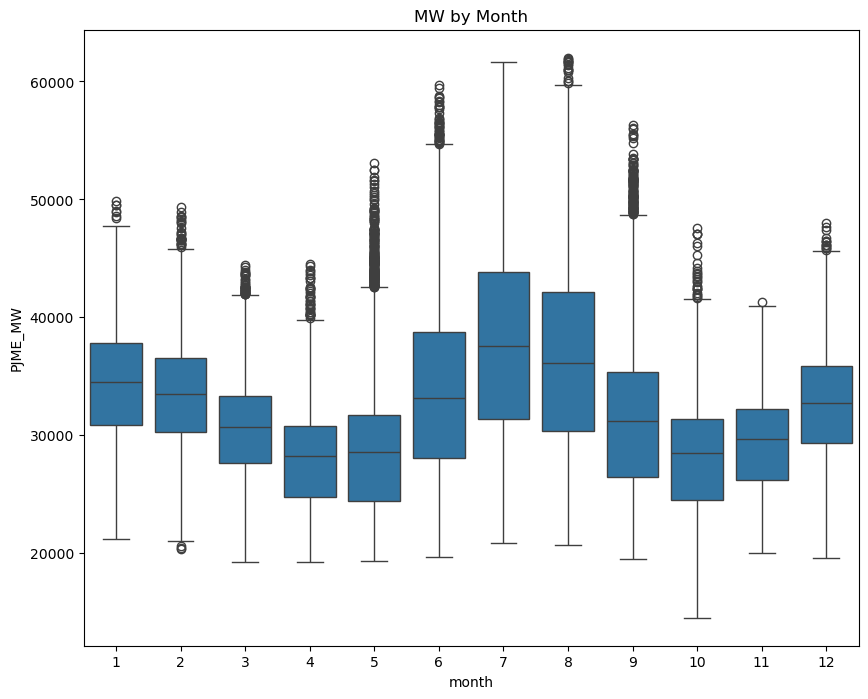

In [321]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data = df , x='month', y='PJME_MW')
ax.set_title('MW by Month')
plt.show()

# Crate a Model

In [324]:
train = create_features(train)
test  = create_features(test)

In [326]:
df.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

In [328]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year','dayofyear']
TARGET = 'PJME_MW'

In [330]:
# segmenter (train) to features and trages
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]


In [332]:
reg   = xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50,
                        learning_rate=0.001)
reg.fit(X_train,y_train , eval_set=[(X_train,y_train),(X_test,y_test)],
        verbose=100)

[0]	validation_0-rmse:6447.78573	validation_1-rmse:6517.54145
[100]	validation_0-rmse:6026.49339	validation_1-rmse:6131.08053
[200]	validation_0-rmse:5654.75124	validation_1-rmse:5796.65490
[300]	validation_0-rmse:5326.88030	validation_1-rmse:5505.59274
[400]	validation_0-rmse:5039.56899	validation_1-rmse:5253.21086
[500]	validation_0-rmse:4788.58887	validation_1-rmse:5034.74880
[600]	validation_0-rmse:4565.97498	validation_1-rmse:4847.76655
[700]	validation_0-rmse:4372.19812	validation_1-rmse:4687.11295
[800]	validation_0-rmse:4202.53312	validation_1-rmse:4547.57144
[900]	validation_0-rmse:4055.65261	validation_1-rmse:4427.00726
[999]	validation_0-rmse:3929.32983	validation_1-rmse:4325.35302


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.001, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

# Feature Importance

In [334]:
"""
-feature_importances_ attribute shows the importance
of each feature in making predictions.
-it is available in tree-based models.
"""
reg.feature_importances_

array([0.35825273, 0.163916  , 0.0120348 , 0.3130506 , 0.01360207,
       0.1391438 ], dtype=float32)

In [337]:
pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

,importance
hour,0.358253
dayofweek,0.163916
quarter,0.012035
month,0.313051
year,0.013602
dayofyear,0.139144


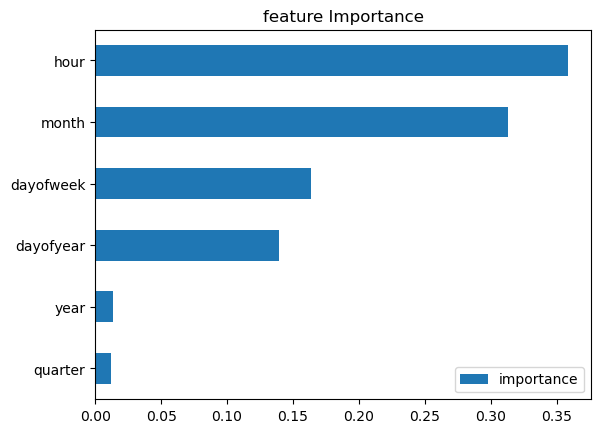

In [339]:
fi=pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh',title='feature Importance')
plt.show()

# Forecast on Test 

In [342]:
#test['prediction'] means traget (y_pred)  that the model predict
test['prediction'] = reg.predict(X_test)

In [344]:
#Merge our data with prediction resualt
df.merge(test[['prediction']] , how='left',left_index=True,right_index=True)

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,prediction
Datetime,,,,,,,,
2002-01-01 01:00:00,30393.0,1,1,1,1,2002,1,NaN
2002-01-01 02:00:00,29265.0,2,1,1,1,2002,1,NaN
2002-01-01 03:00:00,28357.0,3,1,1,1,2002,1,NaN
2002-01-01 04:00:00,27899.0,4,1,1,1,2002,1,NaN
2002-01-01 05:00:00,28057.0,5,1,1,1,2002,1,NaN
...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,44057.0,20,3,3,8,2018,214,39690.410156
2018-08-02 21:00:00,43256.0,21,3,3,8,2018,214,39462.277344
2018-08-02 22:00:00,41552.0,22,3,3,8,2018,214,38719.152344


In [346]:
df=df.merge(test[['prediction']] , how='left',left_index=True,right_index=True)

Text(0.5, 1.0, 'Raw Dat and Predction')

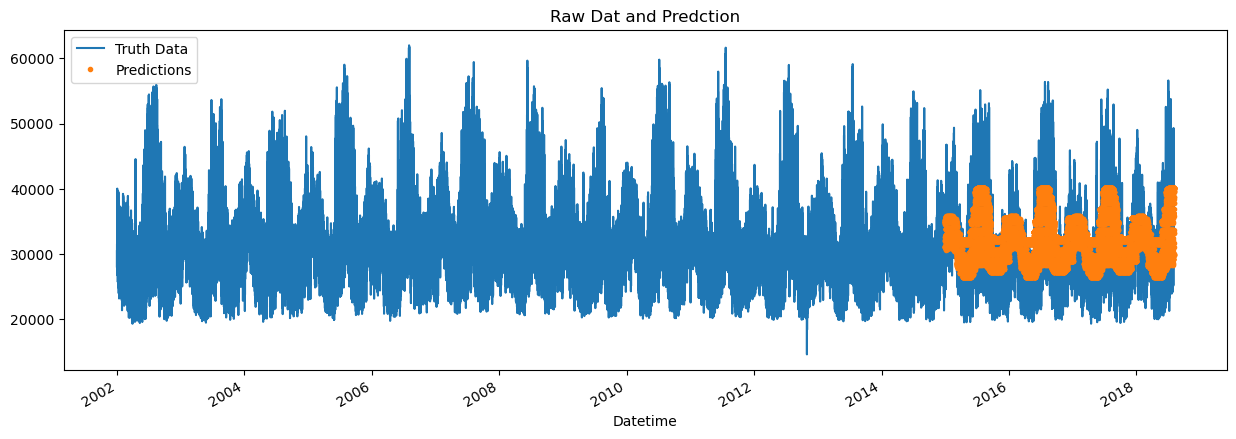

In [348]:
ax=df[['PJME_MW']].plot(figsize=(15,5))
df[['prediction']].plot(ax=ax ,style='.')
plt.legend(['Truth Data','Predictions'])
ax.set_title('Raw Dat and Predction')

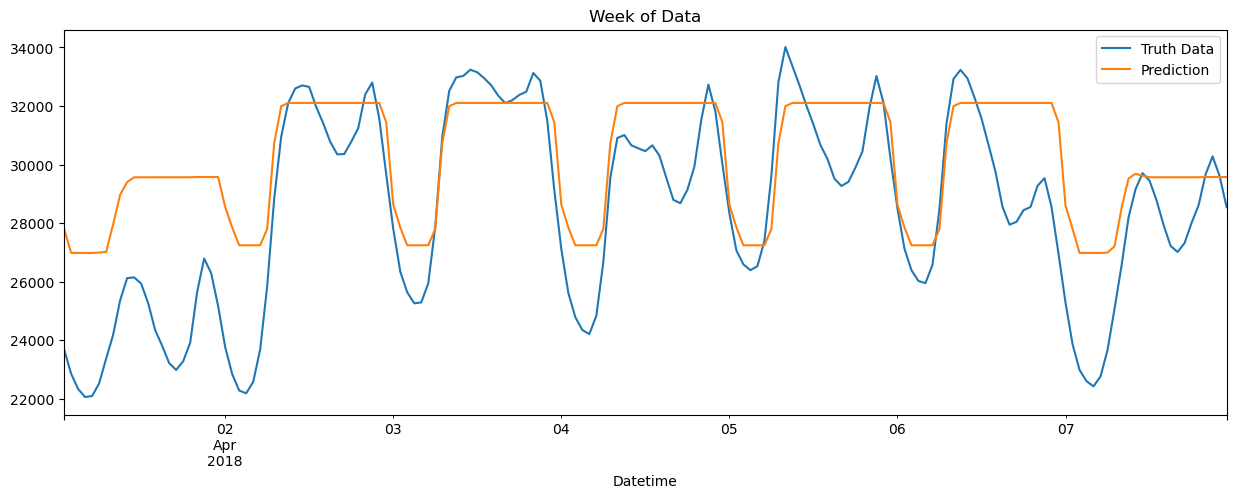

In [355]:
ax=df.loc[(df.index > '2018-04-01') & (df.index < '2018-04-08')]['PJME_MW']\
  .plot(figsize=(15,5), title='Week of Data')
df.loc[(df.index > '2018-04-01') & (df.index < '2018-04-08')]['prediction']\
  .plot()
plt.legend(['Truth Data','Prediction'])
plt.show()

In [361]:
"""
 Root Mean Squared Error (RMSE), 
 measures how far off the predictions are on average. 
 If the RMSE is high, it means the XGBoost model is not predicting well.
"""
score=np.sqrt(mean_squared_error(test['PJME_MW'],test['prediction']))
print(f'RMSE Score on Test set : {score:0.2f}')

RMSE Score on Test set : 4325.35


In [367]:
test['error']=np.abs(test[TARGET]-test['prediction'])

In [369]:
test['date'] = test.index.date

In [379]:
# average prediction error for each date
test.groupby('date')['error'].mean().sort_values(ascending=False).head(5)

date
2016-08-13    12092.418620
2016-08-14    11407.225098
2018-01-06    11024.924316
2015-02-20    10791.006348
2016-09-09    10337.963704
Name: error, dtype: float64

# Testing the Model on a New Date

In [395]:
new_date = pd.to_datetime('2025-04-01 12:00:00') # Example: April 1, 2025, at noon
new_data = pd.DataFrame(index=[new_date])

In [391]:
print(new_date.hour)

12


In [401]:
new_data = create_features(new_data)
X_new = new_data

# Make the prediction
predicted_value = reg.predict(X_new)

# Show the result
print(f"Predicted Energy Consumption on {new_date}: {predicted_value[0]:,.2f} MW")

Predicted Energy Consumption on 2025-04-01 12:00:00: 32,105.35 MW
